In [44]:
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
from importlib import reload
import InputList
import BinaryReader
import Preprocessor
import models
import Callbacks

In [127]:
reload(Callbacks)

<module 'Callbacks' from '/home/julius/dataspellprojects/oct-classifier/Callbacks.py'>

## Make this such that it can be used for prediction and training pipeline

In [122]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
reader = BinaryReader.BinaryReader()  # TODO: Normalizer
training_dataset, validation_dataset = reader.create_training_datasets(InputList.training_files)
preprocesser = Preprocessor.Preprocessor(training_dataset)

Num GPUs Available:  0


In [43]:
print("Creating Normalization Layer:")
normalization_layer = preprocesser.normalize_layer()

Creating Normalization Layer:


2022-02-03 17:41:36.437851: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-03 17:41:36.458438: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


In [48]:
model = models.classiRaw3D(training_dataset.element_spec[0].shape, normalization_layer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1536, 23, 28, 1)] 0         
_________________________________________________________________
normalization (Normalization (None, 1536, 23, 28, 1)   3         
_________________________________________________________________
permute_4 (Permute)          (None, 1, 23, 28, 1536)   0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 23, 28, 768)    1179648   
_________________________________________________________________
permute_5 (Permute)          (None, 768, 23, 28, 1)    0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 768, 23, 28, 32)   896       
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 384, 11, 14, 32)   0   

In [112]:
for lala in data.take(2):
    print(data)

AttributeError: 'tuple' object has no attribute 'take'

In [125]:
hallo = preprocesser.batch(20).take(1)

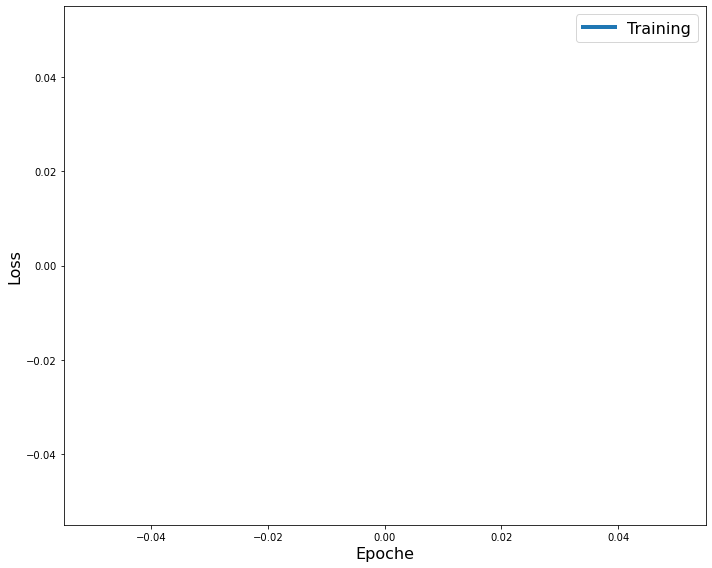

1/1 [==============================] - 37s 37s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000


2022-02-04 14:28:55.600432: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: savedModels/first/assets


In [128]:
history = model.fit(
    hallo,
    epochs=10,
    validation_data=Preprocessor.Preprocessor(validation_dataset).batch(20).take(1),
    callbacks=Callbacks.my_callbacks
)
model.save('savedModels/first')

In [182]:
predicted = model.predict(hallo)
print(predicted)

<class 'numpy.ndarray'>


In [194]:
a = elemi[1].numpy().astype("uint16")
print(type(a[0]))

<class 'numpy.uint16'>


In [193]:
b = predicted[:,0].astype("uint16")
print(type(b[0]))

<class 'numpy.uint16'>


In [195]:
lossi = tf.keras.metrics.categorical_crossentropy(
    a, b
)
print(lossi)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a uint16 tensor but is a float tensor [Op:Mul]

In [164]:
for elemi in hallo:
    print(elemi)

(<tf.Tensor: shape=(20, 1536, 23, 28, 1), dtype=uint16, numpy=
array([[[[[34304],
          [33088],
          [31968],
          ...,
          [36864],
          [36768],
          [38432]],

         [[35648],
          [34944],
          [31360],
          ...,
          [35104],
          [36864],
          [38432]],

         [[33280],
          [30880],
          [33440],
          ...,
          [33760],
          [36832],
          [36192]],

         ...,

         [[34016],
          [32896],
          [32480],
          ...,
          [37216],
          [36224],
          [36096]],

         [[35392],
          [33216],
          [33376],
          ...,
          [38080],
          [35680],
          [40768]],

         [[36896],
          [30400],
          [34528],
          ...,
          [35360],
          [37376],
          [37376]]],


        [[[35232],
          [33184],
          [32672],
          ...,
          [36448],
          [35328],
          [38624]],

   

In [107]:
preprocesser.batch(20)

<BatchDataset shapes: ((None, 1536, 23, 28, 1), (None,)), types: (tf.uint16, tf.uint8)>

In [8]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  0


In [50]:
model.load_weights('checkpoints/best_model.data-00000-of-00001')

OSError: SavedModel file does not exist at: checkpoints/best_model.data-00000-of-00001/{saved_model.pbtxt|saved_model.pb}

print_function(Bag Number, dataset)

-> In einem Bag sind 7000 Instanzen

# Bag Level Model:

Ich hab ganz viele Softmaxes und von denen nehm ich einfach den Max Wert

In [58]:
test_dataset = reader.create_test_dataset([InputList.healthy_training_files[0]])
output = model.predict(test_dataset.batch(20))

KeyboardInterrupt: 

In [57]:
output

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [54]:
model.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(1536, 768) dtype=float32, numpy=
 array([[0.41104522, 0.3186501 , 0.28904292, ..., 0.3110835 , 0.31652424,
         0.3510586 ],
        [0.28842035, 0.3355936 , 0.28861123, ..., 0.3175595 , 0.36737376,
         0.370917  ],
        [0.36241665, 0.31876677, 0.34363836, ..., 0.26273364, 0.31683776,
         0.33114478],
        ...,
        [0.2398529 , 0.12921295, 0.06889734, ..., 0.18101345, 0.22804113,
         0.19817252],
        [0.209363  , 0.15035321, 0.13889684, ..., 0.26466373, 0.15516728,
         0.18990627],
        [0.25307658, 0.16522735, 0.27347544, ..., 0.25581047, 0.18955027,
         0.24010696]], dtype=float32)>,
 <tf.Variable 'conv3d_8/kernel:0' shape=(3, 3, 3, 1, 32) dtype=float32, numpy=
 array([[[[[0.36989447, 0.37985703, 0.4298614 , 0.3542651 , 0.3590698 ,
            0.2783796 , 0.32236165, 0.33206007, 0.3004713 , 0.3423358 ,
            0.3631813 , 0.33567038, 0.36521488, 0.45437172, 0.3147676 ,
            0.28168517, 0